keywords: NLP (TALN), classification.

# The Spam Detector

# Description

Madame Esposito devellope pour son entreprise un chatbot dans le but de répondre automatiquement à ses nombreux clients. Cependant son programme recoit un grand nombre de message malveillant ou à caractere publicitaire ce qui degrade les performance de son bot en plus d'occasionner des traitements informatiques se répercutant sur sa facture d'electricité.

Madame Esposito vous a contacté afin de créer un programme capable de detecter automatiquement les SPAM. 
Pour cela, elle a construit un jeux de donnée comportant un ensemble de SMS de type SPAM et NON SPAM (HAM), disponible à l'addresse suivante : 
http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

Par ailleurs, afin d'intégrer les résultats dans son équipe, elle nous demande les choses suivantes:
* Afin d'estimer le cout du devellopement et suivre le projet, une checklist des taches à réaliser doit être rédigé.

https://trello.com/b/JNiVTMvb/spam-detector

* Vous devez créer des fonctions pour les diférentes partie de votre code afin de pouvoir les réutiliser facilement
* Vous devez effectuer une validation croisé (cross-validation) sur 10 jeux de'apprentissage et de test différent. Le seed doit être fixé à 42 et le jeux de test doit représenter 20% des données.
* Comparer au moins trois algorithme de classification en terme de **f1 score**. Lequel est le plus puissant ?

## Bonus

Pouvez améliorer les résultats ?
* est-ce que la lemmatisation améliore les résultats ?
* est-ce que la racinisation (stemming) améliore les résultats ?

Une fois ces étapesréalisées, reproduire la même expérience avec le jeux suivant, représant cette fois des commentaires Youtube :
https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

Les performances sont-elles similaire à ceux obtenus avec le jeux de données précedent ?

Madame esposito souhaite controler si les modéles appris avec le premier jeux de données sont capable de prédire les données de test du deuxième jeu et vice-versa.
Réaliser un tableau comparant
* les résultats de prédiction du modeles appris sur les SPAN SMS pour prédire les SPAM commentaire youtube.
* et les résultats de prédiction du modeles appris surles SPAM commentaire youtube pour prédire les SPAM SMS youtube

In [1]:
# PSEUDO random workgroups creation
import numpy as np

app = 'Anthony Constant Joshua Fatima Julien Bassem Caroline Dan Ines Nidhal Sacia Xavier Roger Hachem Jean-Pierre Myriam Ludo Olivier Pierre-Etienne Wiem Cecilia'.split()
np.random.seed(1)
rapp = [app[i] for i in np.random.choice(21, 21, replace=False)]
for i in range(5):
    # Last member of the group is the SPEAKER
    print(rapp[4*i:4*i+4] + ([rapp[-1]] if i == 4 else []))
    # I (Olivier) am in the 2nd group (BLUE in Discord) & Julien is the SPEAKER

['Myriam', 'Sacia', 'Fatima', 'Pierre-Etienne']
['Olivier', 'Jean-Pierre', 'Ludo', 'Julien']
['Joshua', 'Caroline', 'Dan', 'Constant']
['Hachem', 'Anthony', 'Cecilia', 'Wiem']
['Nidhal', 'Ines', 'Roger', 'Xavier', 'Bassem']


# Proposed Plan

**1) Veille en Traitement du langage + checklist + 45min**

https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1

https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63

* Parsing and tokenization ?

PARSING involves undertaking grammatical analysis for the provided sentence.

STEMMING refers to the process of slicing the end or the beginning of words with the intention of removing affixes & suffixes.

LEMMATIZATION has the objective of reducing a word to its base form and grouping together different forms of the same word.

TOKENIZATION is the process of segmenting running text into sentences and words. In essence, it’s the task of cutting a text into pieces called tokens, and at the same time throwing away certain characters, such as punctuation.

* Advantage of TFIDF ?

One approach in NLP is to rescale the frequency of words by how often they appear in all texts (not just the one we are analyzing) so that the scores for frequent words like “the”, that are also frequent across other texts, get penalized. This approach to scoring is called “Term Frequency — Inverse Document Frequency” (TFIDF), and improves the bag of words by weights. Through TFIDF frequent terms in the text are “rewarded” (like the word “they” in our example), but they also get “punished” if those terms are frequent in other texts we include in the algorithm too. On the contrary, this method highlights and “rewards” unique or rare terms considering all texts. Nevertheless, this approach still has no context nor semantics.

* Stops words ?

STOP WORDS removal includes getting rid of common language articles, pronouns and prepositions such as “and”, “the” or “to” in english.

* Vectorization ? Bag of words ?

The BAG OF WORDS is a commonly used model in NLP that allows you to count all words in a piece of text.

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

- tokenizing strings and giving an integer id for each possible token
(for instance by using white-spaces and punctuation as token separators)
- counting the occurrences of tokens in each document
- normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents

Each individual token occurrence frequency (normalized or not) is treated as a feature. The vector of all the token frequencies for a given document is considered as a multivariate sample. A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

## Installation & Introduction to Natural Language Toolkit (NLTK)

https://code.tutsplus.com/fr/tutorials/introducing-the-natural-language-toolkit-nltk--cms-28620


In [2]:
import nltk
# Once executed the command below will be commented for kernel restart ;-)
#nltk.download()

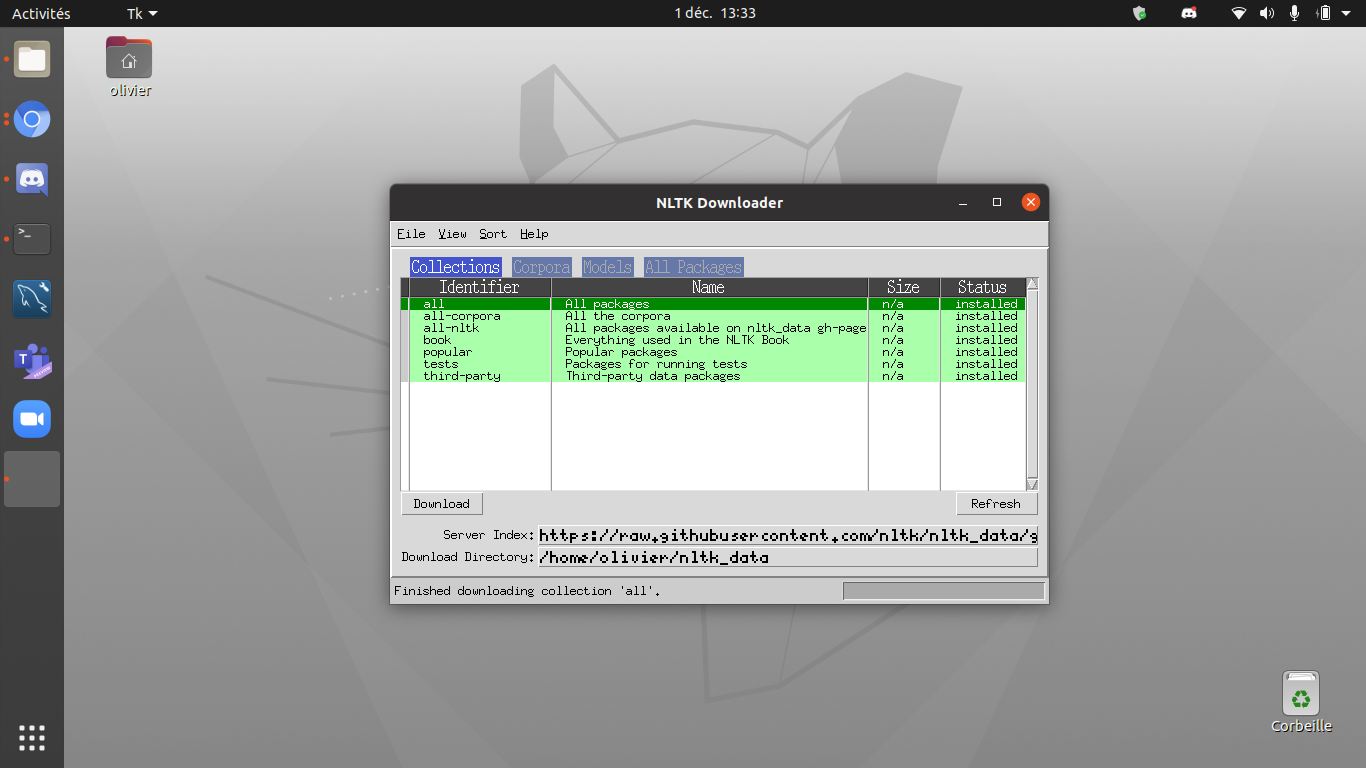

In [3]:
from nltk.corpus import stopwords
print(set(stopwords.words('english')))

{'my', 'again', 'into', "wasn't", 'is', 'didn', 'am', 'or', 'ma', "shouldn't", 'an', 'by', 'they', 'just', 'shouldn', 'with', "isn't", "won't", 'where', 'yours', 'their', 'once', 'themselves', 'when', "you're", 'if', 'wouldn', 'below', 'here', 'on', 'more', 'how', 'have', 'hadn', 'a', 'himself', 'because', 'own', "wouldn't", 'i', "didn't", 'so', 'mustn', 'ain', 'him', 'in', 'whom', 'these', "mightn't", 'same', 'our', 'under', 'me', 'before', 'too', 'very', 'off', "you've", 'being', 'why', 'm', 'd', 'hasn', 'which', 'both', 'those', 'during', "you'd", 'nor', 'further', 'can', 'been', 'not', 'are', 'we', 'his', 'from', 'such', "hasn't", 'who', "mustn't", 'did', 'over', 'no', "couldn't", 'won', 'do', 'her', 'that', 'until', 'll', "haven't", 'this', 'of', 'then', 'itself', "shan't", 'all', 'for', 'don', 'at', 'does', 'o', 'couldn', 'it', 'but', 'ourselves', "you'll", 'few', 'what', 'out', 's', 'your', 'than', 'ours', 'each', "doesn't", 'isn', 'through', 'its', 'wasn', 'down', "aren't", 'y'

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = 'In this tutorial, I\'m learning NLTK. It is an interesting platform.'
stop_words = set(stopwords.words('english'))
words = word_tokenize(text)

new_sentence = []

for word in words:
    if word not in stop_words:
        new_sentence.append(word)

print(new_sentence)

['In', 'tutorial', ',', 'I', "'m", 'learning', 'NLTK', '.', 'It', 'interesting', 'platform', '.']


**2) Load, clean and prepare the data**

Vectoriser et netoyer vos données.
https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

## Data set dowloaded in local sub folder ./data

http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection


In [5]:
import pandas as pd
# from io import StringIO

df = pd.read_csv('/home/olivier/GitHub/20201201_Brief_SPAM_Detector/data/smsspamcollection/SMSSpamCollection.txt',
                     sep = '\t',
                     names = ['label', 'raw_text'])
df

,label,raw_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   raw_text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [7]:
print(df.describe())

       label                raw_text
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [8]:
targets = df['label']
#targets[ targets == "ham"] = 0
#targets[ targets == "spam"] = 1
print(targets.describe())

count     5572
unique       2
top        ham
freq      4825
Name: label, dtype: object


In [9]:
corpus = df['raw_text']
print(corpus.describe())

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: raw_text, dtype: object


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words)
cv_ft = cv.fit_transform(corpus)
print(cv_ft)

  (0, 3531)	1
  (0, 4311)	1
  (0, 5871)	1
  (0, 2312)	1
  (0, 1301)	1
  (0, 1745)	1
  (0, 3615)	1
  (0, 8417)	1
  (0, 4437)	1
  (0, 1743)	1
  (0, 2036)	1
  (0, 3575)	1
  (0, 1074)	1
  (0, 8207)	1
  (1, 5461)	1
  (1, 4473)	1
  (1, 4279)	1
  (1, 8322)	1
  (1, 5488)	1
  (2, 3335)	1
  (2, 2927)	2
  (2, 8376)	1
  (2, 2153)	1
  (2, 8334)	1
  (2, 3064)	2
  :	:
  (5567, 165)	1
  (5567, 5379)	1
  (5568, 3871)	1
  (5568, 3544)	1
  (5568, 3322)	1
  (5568, 2959)	1
  (5569, 5093)	1
  (5569, 5802)	1
  (5569, 7326)	1
  (5570, 3335)	1
  (5570, 8253)	1
  (5570, 4578)	1
  (5570, 5296)	1
  (5570, 8007)	1
  (5570, 7005)	1
  (5570, 2869)	1
  (5570, 3449)	1
  (5570, 1779)	1
  (5570, 3669)	1
  (5570, 4131)	1
  (5570, 912)	1
  (5570, 1540)	1
  (5571, 5205)	1
  (5571, 7828)	1
  (5571, 6460)	1


## Quelle est le type Python de vos données après vectorisation ?

In [24]:
cv_ft

<5572x8577 sparse matrix of type '<class 'numpy.int64'>'
	with 47370 stored elements in Compressed Sparse Row format>

## Quelle sont les 10 mots les plus fréquent dans le jeux de données ?

In [25]:
print(len(cv.get_feature_names()))

8577


In [26]:
print(cv.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

In [27]:
# Transform the sparse matrix into a numpy matrix documents words (mdw)
mdw_cv_ft = cv_ft.toarray()
# Type of the matrix documents terms mdt
print(type(mdw_cv_ft))
# Size of the matrix
print(mdw_cv_ft.shape)

<class 'numpy.ndarray'>
(5572, 8577)


In [28]:
# Frequency of the terms
freq_words = np.sum(mdw_cv_ft,axis=0)
print(freq_words)
# Arg sort
index = np.argsort(freq_words)
print(index)
# Print the matrix words and their frequency
mwf = pd.DataFrame({'word':np.asarray(cv.get_feature_names())[index],'freq':freq_words[index]})
print(mwf)

[10 29  1 ...  1  1  1]
[4288 4821 4818 ... 3483 7992 1804]
             word  freq
0             jot     1
1         mallika     1
2         malarky     1
3         makiing     1
4     maintaining     1
...           ...   ...
8572           lt   316
8573           gt   318
8574          get   391
8575           ur   391
8576         call   593

[8577 rows x 2 columns]


In [29]:
print('MOST 10 frequent words')
print(mwf[-10:])

MOST 10 frequent words
      word  freq
8567  good   247
8568  know   262
8569    go   283
8570  free   284
8571    ok   293
8572    lt   316
8573    gt   318
8574   get   391
8575    ur   391
8576  call   593


## Les moins fréquents ?

In [30]:
print('LESS 10 frequent words')
print(mwf[:10])

LESS 10 frequent words
           word  freq
0           jot     1
1       mallika     1
2       malarky     1
3       makiing     1
4   maintaining     1
5        mailed     1
6       mahfuuz     1
7      mahaveer     1
8  magicalsongs     1
9    manageable     1


## Tracer la distribution de la fréquence des mots présents dans le jeux de données. Qu'obersvez vous ?

## Aides/propositions
* Stop words avec NLTK

**3) Apprenstissage**

Que représente la mesure f1 ?

In statistical analysis of binary classification, the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results (TP) divided by the number of all positive results (TP + FP), including those not identified correctly, and the recall is the number of correctly identified positive results (TP) divided by the number of all samples that should have been identified as positive (TP + FN).

The F1 score is the harmonic mean of the precision and recall.
The relative contribution of precision and recall to the F1 score are equal.
The formula for the F1 score is F1 = 2 * (precision * recall) / (precision + recall)

Quelles sont ces avantages sur d'autre mesure tel que la précision le rappel ou l'accuracy ?



**4) Veille cross validation**
https://scikit-learn.org/stable/modules/cross_validation.html

Utilisez la méthode de [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) pour construire vos jeux de données permettant la validation croisée.

In [64]:
from sklearn.model_selection import ShuffleSplit

X = mdw_cv_ft
y = np.array(targets)
rs = ShuffleSplit(test_size=0.2, random_state=42)
print("Number of splits :", rs.get_n_splits(X))
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    rtrain = train_index.shape[0]/ X.shape[0]
    rtest = test_index.shape[0] / X.shape[0]
    print("train =", len(train_index), "documents", "=> train size ratio :", "{:.0%}".format(rtrain))
    print("test =", len(test_index), "documents", "=> test size ratio :", "{:.0%}".format(rtest))

Number of splits : 10
TRAIN: [1978 3989 3935 ... 5226 5390  860] TEST: [3245  944 1044 ... 5556 4205 4293]
train = 4457 documents => train size ratio : 80%
test = 1115 documents => test size ratio : 20%
TRAIN: [1809 4249  448 ... 5215 3867 2077] TEST: [1086  483  855 ... 3609 3902 1851]
train = 4457 documents => train size ratio : 80%
test = 1115 documents => test size ratio : 20%
TRAIN: [1688 2618 2319 ...   53 1245 3166] TEST: [ 577 2279 4517 ... 2743 4177 4220]
train = 4457 documents => train size ratio : 80%
test = 1115 documents => test size ratio : 20%
TRAIN: [  45 2349 4972 ...   98 3693 5304] TEST: [1806 3752 1197 ... 1429 3212 5036]
train = 4457 documents => train size ratio : 80%
test = 1115 documents => test size ratio : 20%
TRAIN: [4670 3060 3614 ... 2703 5187 2965] TEST: [5528 4971  101 ... 3840 4116 1361]
train = 4457 documents => train size ratio : 80%
test = 1115 documents => test size ratio : 20%
TRAIN: [3405 4049 1920 ... 3744 4035 4388] TEST: [5162  590 5271 ... 4270

In [63]:
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25, random_state=42)
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    rtrain = X_train.shape[0]/ X.shape[0]
    rtest = X_test.shape[0] / X.shape[0]
    print("train =", len(train_index), "documents", "=> train size ratio :", "{:.0%}".format(rtrain))
    print("test =", len(test_index), "documents", "=> test size ratio :", "{:.0%}".format(rtest))

TRAIN: [4281  585 4545 ... 1435 3902 1247] TEST: [3245  944 1044 ... 5536 1657 3875]
train = 2786 documents => train size ratio : 80%
test = 1393 documents => test size ratio : 20%
TRAIN: [ 130  697 3894 ... 2198 3155 4020] TEST: [1086  483  855 ... 3753 5378 4454]
train = 2786 documents => train size ratio : 80%
test = 1393 documents => test size ratio : 20%
TRAIN: [5333 2732 5328 ... 3759 2612 2957] TEST: [ 577 2279 4517 ... 3669  927 3441]
train = 2786 documents => train size ratio : 80%
test = 1393 documents => test size ratio : 20%
TRAIN: [1862 2587 2267 ... 5023 4154  835] TEST: [1806 3752 1197 ... 3505 3792 4080]
train = 2786 documents => train size ratio : 80%
test = 1393 documents => test size ratio : 20%
TRAIN: [2379 3572  417 ... 1105 2521 1581] TEST: [5528 4971  101 ... 2512  148 2695]
train = 2786 documents => train size ratio : 80%
test = 1393 documents => test size ratio : 20%


**5) Train**

Fit the models and compare the performance in a table that show
* the mean of the f1 score
* the standard deviation of the f1 score

Qu'observez vous ?

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

X = mdw_cv_ft
y = np.array(targets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape, y_train.shape)
print(type(X_train), type(y_train))

(4457, 8713) (4457,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [20]:
print(X_test.shape, y_test.shape)
print(type(X_test), type(y_test))

(1115, 8713) (1115,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR = LogisticRegression()
clf = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[966   0]
 [ 13 136]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [41]:
from sklearn import svm

X = mdw_cv_ft
y = np.array(targets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[966   0]
 [ 18 131]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Logistic Regression is better than Support Vector Machine

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.96155179, 0.96155179, 0.95915224, 0.95671201, 0.96580076])

In [49]:
print("f1_macro with 5 Cross Validation : %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

f1_macro with 5 Cross Validation : 0.9655 (+/- 0.0061)


In [46]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv, scoring='f1_macro')
scores

array([0.96900147, 0.96043815, 0.96711122, 0.9671907 , 0.96355552])

In [50]:
print("f1_macro with shuffle split : %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

f1_macro with shuffle split : 0.9655 (+/- 0.0061)


### Cross validation, with or without shuffle shift, doesn't improve the score

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(stop_words=stop_words)
X_TFIDF = vectorizer.fit_transform(corpus)
y_TFIDF = np.array(targets)
X_train, X_test, y_train, y_test = train_test_split(X_TFIDF, y_TFIDF, test_size=0.2, random_state=42)
LR = LogisticRegression()
clf = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[965   1]
 [ 45 104]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.99      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



### Logistic regression score is worse with TFIDF normalizaztion